In [2]:
#Important imports
import torch
from torch import nn as nn
from torch.utils.data import DataLoader
from torch import optim
import matplotlib.pyplot as plt
from torch.nn import functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms,models
import matplotlib.pyplot as plt

#Choosting devide to be gpu if have one, else cpu
DEVICE = torch.device('cpu')

In [3]:
transformations = transforms.Compose([ 
     transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
     )
])

In [4]:
flowers_data = ImageFolder(r'D:\AI\flowers',transform = transformations)
test_data = ImageFolder(r'D:\AI\flowers',transform = transformations)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


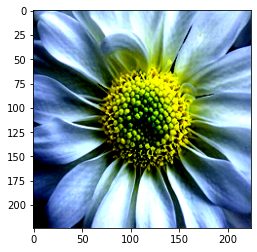

In [5]:
plt.imshow((flowers_data[0][0]).permute(1,2,0))

In [6]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,32,kernel_size = 3,padding = 1)
        
        self.pool1 = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(32,64,kernel_size =3,padding = 1)
        
        self.pool2 = nn.MaxPool2d(2)
                
        self.conv3 = nn.Conv2d(64,128,kernel_size =3,padding = 1)
        
        self.pool3 = nn.MaxPool2d(2)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(128*28*28,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,1)
             
    def forward(self,x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
    
        out = self.flatten(out)
    
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))
    
        return out
    

In [7]:
def training_loop(n_epochs, optimizer, model, loss_fn, flowers_loader, test_loader, print_plot=True):
    flowers_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)
    
    for epoch in range(n_epochs):
        model.train()
        for example, labels in  flowers_loader:
            example = example.to(DEVICE)
            labels = labels.to(DEVICE)
            
            labels = labels.unsqueeze(1)
            
            output = model(example.float())
            loss = loss_fn(output, labels.float())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        model.eval()
        with torch.no_grad():
            for loader, accuracy in [( flowers_loader,  flowers_accuracy), (test_loader, test_accuracy)]:
                correct = 0
                total = 0
                
                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)
                    
                    outputs = model(examples.float())
                    predicted = torch.round(outputs)
                    
                    total += labels.shape[0]
                    correct += (predicted == labels).sum()
                print(f"correct - {correct}")
                print(f"total - {total}")
                accuracy[epoch] = correct / total
        print(f"EPOCH - {epoch+1}\n  Flowers Accuracy - { flowers_accuracy[epoch]} \n Test Accuracy - {test_accuracy[epoch]}")
    if print_plot:
        epochs = range(n_epochs)

        #Ploting both curves, train aFd val 
        plt.plot(epochs, flowers_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [8]:
flowers_loader = DataLoader( flowers_data,batch_size =32,shuffle = True)
test_loader = DataLoader( test_data,batch_size =32,shuffle = True)

correct - 1242
total - 1548
correct - 1242
total - 1548
EPOCH - 1
  Flowers Accuracy - 0.8023256063461304 
 Test Accuracy - 0.8023256063461304
correct - 1305
total - 1548
correct - 1305
total - 1548
EPOCH - 2
  Flowers Accuracy - 0.8430232405662537 
 Test Accuracy - 0.8430232405662537
correct - 1315
total - 1548
correct - 1315
total - 1548
EPOCH - 3
  Flowers Accuracy - 0.8494831919670105 
 Test Accuracy - 0.8494831919670105
correct - 1344
total - 1548
correct - 1344
total - 1548
EPOCH - 4
  Flowers Accuracy - 0.8682170510292053 
 Test Accuracy - 0.8682170510292053
correct - 1319
total - 1548
correct - 1319
total - 1548
EPOCH - 5
  Flowers Accuracy - 0.8520671725273132 
 Test Accuracy - 0.8520671725273132
correct - 1364
total - 1548
correct - 1364
total - 1548
EPOCH - 6
  Flowers Accuracy - 0.881136953830719 
 Test Accuracy - 0.881136953830719
correct - 1383
total - 1548
correct - 1383
total - 1548
EPOCH - 7
  Flowers Accuracy - 0.893410861492157 
 Test Accuracy - 0.893410861492157
cor

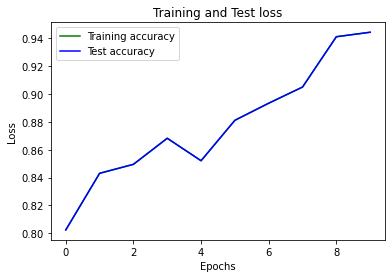

In [9]:
learning_rate = 1e-3 #0.001

model = Net().to(DEVICE)

optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    flowers_loader = flowers_loader,
    test_loader = test_loader,
    print_plot = True,
    
)

correct - 1112
total - 1548
correct - 1112
total - 1548
EPOCH - 1
  Flowers Accuracy - 0.7183462381362915 
 Test Accuracy - 0.7183462381362915
correct - 1425
total - 1548
correct - 1425
total - 1548
EPOCH - 2
  Flowers Accuracy - 0.9205426573753357 
 Test Accuracy - 0.9205426573753357
correct - 1284
total - 1548
correct - 1284
total - 1548
EPOCH - 3
  Flowers Accuracy - 0.8294573426246643 
 Test Accuracy - 0.8294573426246643
correct - 1497
total - 1548
correct - 1497
total - 1548
EPOCH - 4
  Flowers Accuracy - 0.9670542478561401 
 Test Accuracy - 0.9670542478561401
correct - 1415
total - 1548
correct - 1415
total - 1548
EPOCH - 5
  Flowers Accuracy - 0.9140827059745789 
 Test Accuracy - 0.9140827059745789
correct - 1466
total - 1548
correct - 1466
total - 1548
EPOCH - 6
  Flowers Accuracy - 0.947028398513794 
 Test Accuracy - 0.947028398513794
correct - 1520
total - 1548
correct - 1520
total - 1548
EPOCH - 7
  Flowers Accuracy - 0.9819121360778809 
 Test Accuracy - 0.9819121360778809
c

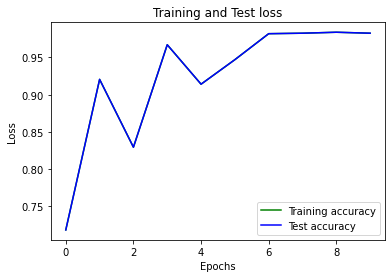

In [10]:
from collections import OrderedDict

model = models.resnet50(pretrained = True)

for param in model.parameters():
    param.required_grad = False
    
nr_feat = model.fc.in_features #2048
model.fc = nn.Sequential(OrderedDict([('fc',nn.Linear(nr_feat,1)),('sigmoid',nn.Sigmoid())]))

learning_rate = 1e-3 #0.001
model = model.to(DEVICE)
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    flowers_loader = flowers_loader,
    test_loader = test_loader
    
)
  

In [11]:
torch.save(model, "model.pth")